In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

### 1. Process data

In [27]:
def process_data(df):
    # Fill NaN values in 'Crime_rate' with 5922
    df["Crime_rate"].fillna(5922, inplace=True)
    
    # Convert feature to be numctic
    df['median_income'] = df['median_2019_2020'].str.replace(',', '').astype(float)
    df['is_nearby_hospital'] = df['is_nearby_hospital'].astype(int)
    df['is_cbd'] = df['is_cbd'].astype(int)
    
    # Select the columns that going to be used in model
    selected_features = df[['Beds', 'Baths', 'Parking', 'Crime_rate', 'Pop_density', 'median_income'
                          ,'school_rank_value', 'bus_value', 'tram_value', 'train_value', 'country_train'
                          , 'walk_time', 'drive_time', 'is_cbd', 'is_nearby_hospital', 'cost_text']].copy()
    
    # Modify certain features so that higher values are considered better
    features_reverse = ['school_rank_value', 'bus_value', 'tram_value', 'train_value', 'country_train']
    selected_features[features_reverse] = selected_features[features_reverse].applymap(lambda x: 1-x if x != 0 else x)

    features_inver = ['Crime_rate', 'walk_time', 'drive_time']
    selected_features[features_inver] = 1 / selected_features[features_inver]
    
    return selected_features

In [28]:
# read data
apartment = pd.read_csv('../Final/apartment.csv')
apartment = process_data(apartment)

house = pd.read_csv('../Final/house.csv')
house = process_data(house)

town_house = pd.read_csv('../Final/town_house.csv')
town_house = process_data(town_house)

### 2. Apartment 

#### 2.1 Heat map

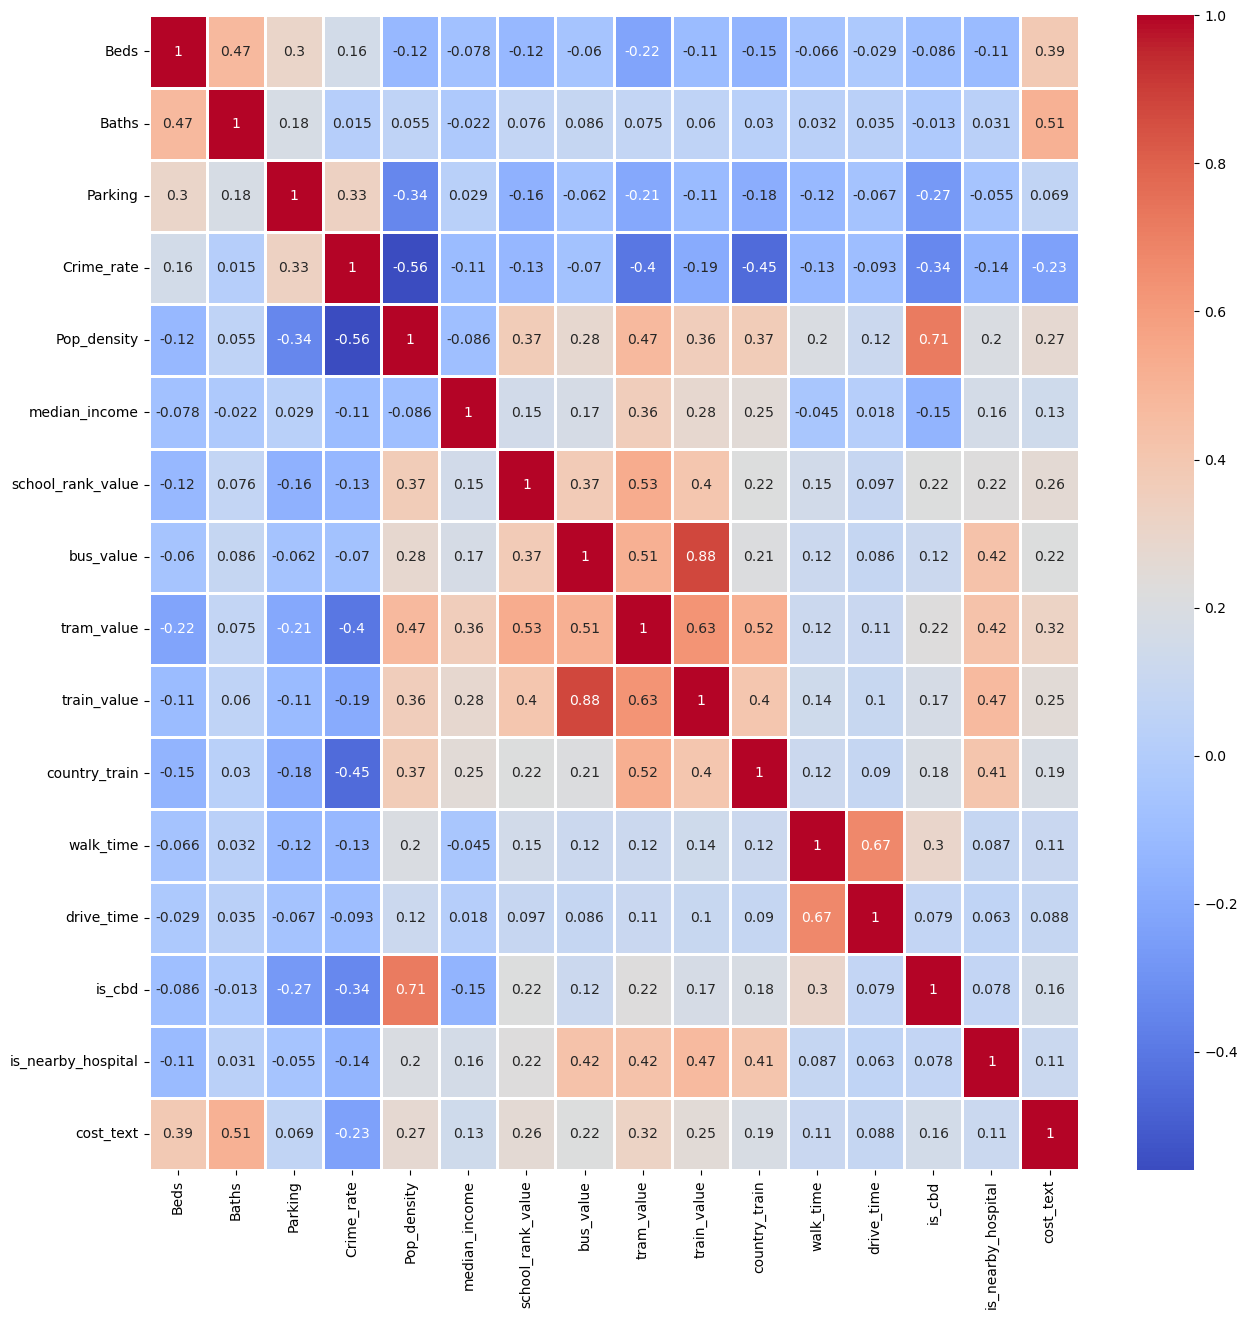

In [29]:
# Calculate correlations
corr = apartment.corr()
# Create a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.show()

#### 2.2 ANOVA Table 

In [31]:
# Ensure that 'cost_text' is treated as a numeric variable
apartment['cost_text'] = pd.to_numeric(apartment['cost_text'], errors='coerce')

# Fit the model
model = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
             school_rank_value + bus_value + tram_value + train_value + country_train + \
             walk_time + drive_time + is_cbd + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.744031e+06     1.0  112.084676   6.664379e-26
Beds                1.416246e+07     1.0  578.489981  1.102158e-120
Baths               1.606773e+07     1.0  656.314259  1.178936e-135
Parking             5.501502e+05     1.0   22.471834   2.195154e-06
Pop_density         3.961792e+05     1.0   16.182623   5.841777e-05
median_income       1.025960e+06     1.0   41.907123   1.054359e-10
school_rank_value   1.485212e+06     1.0   60.666039   8.255082e-15
bus_value           3.768263e+04     1.0    1.539212   2.147968e-01
tram_value          2.352243e+06     1.0   96.081435   1.803188e-22
train_value         5.156245e+03     1.0    0.210616   6.463063e-01
country_train       6.945756e+03     1.0    0.283711   5.943040e-01
walk_time           1.799966e+05     1.0    7.352271   6.722037e-03
drive_time          1.498855e+03     1.0    0.061223   8.045835e-01
is_cbd              6.825520e+04     1.0    2.78

In [33]:
# Ensure that 'cost_text' is treated as a numeric variable
apartment['cost_text'] = pd.to_numeric(apartment['cost_text'], errors='coerce')

# Fit the model
amodel = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + train_value + country_train + \
              walk_time + drive_time + is_cbd + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.744031e+06     1.0  112.084676   6.664379e-26
Beds                1.416246e+07     1.0  578.489981  1.102158e-120
Baths               1.606773e+07     1.0  656.314259  1.178936e-135
Parking             5.501502e+05     1.0   22.471834   2.195154e-06
Pop_density         3.961792e+05     1.0   16.182623   5.841777e-05
median_income       1.025960e+06     1.0   41.907123   1.054359e-10
school_rank_value   1.485212e+06     1.0   60.666039   8.255082e-15
bus_value           3.768263e+04     1.0    1.539212   2.147968e-01
tram_value          2.352243e+06     1.0   96.081435   1.803188e-22
train_value         5.156245e+03     1.0    0.210616   6.463063e-01
country_train       6.945756e+03     1.0    0.283711   5.943040e-01
walk_time           1.799966e+05     1.0    7.352271   6.722037e-03
drive_time          1.498855e+03     1.0    0.061223   8.045835e-01
is_cbd              6.825520e+04     1.0    2.78

In [34]:
# Fit the model
amodel1 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + train_value + country_train + \
              walk_time + is_cbd + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(amodel1, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.743094e+06     1.0  112.068674   6.716197e-26
Beds                1.417753e+07     1.0  579.220820  7.929011e-121
Baths               1.606631e+07     1.0  656.386365  1.137512e-135
Parking             5.500586e+05     1.0   22.472557   2.194318e-06
Pop_density         4.082792e+05     1.0   16.680179   4.497279e-05
median_income       1.030956e+06     1.0   42.119548   9.467110e-11
school_rank_value   1.483746e+06     1.0   60.618212   8.455145e-15
bus_value           3.745857e+04     1.0    1.530364   2.161193e-01
tram_value          2.355649e+06     1.0   96.239645   1.667184e-22
train_value         5.178489e+03     1.0    0.211566   6.455637e-01
country_train       7.064157e+03     1.0    0.288605   5.911412e-01
walk_time           3.844187e+05     1.0   15.705362   7.510585e-05
is_cbd              6.706111e+04     1.0    2.739771   9.794520e-02
is_nearby_hospital  1.278683e+05     1.0    5.22

In [35]:
# Fit the model
amodel2 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + country_train + \
              walk_time + is_cbd + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(amodel2, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.739774e+06     1.0  111.951682   7.113732e-26
Beds                1.419201e+07     1.0  579.909080  5.813768e-121
Baths               1.607765e+07     1.0  656.959337  8.806078e-136
Parking             5.504475e+05     1.0   22.492193   2.172093e-06
Pop_density         4.130691e+05     1.0   16.878688   4.052066e-05
median_income       1.074094e+06     1.0   43.889256   3.862811e-11
school_rank_value   1.481533e+06     1.0   60.537886   8.802384e-15
bus_value           2.024089e+05     1.0    8.270763   4.046875e-03
tram_value          2.488965e+06     1.0  101.703239   1.117767e-23
country_train       4.552892e+03     1.0    0.186039   6.662539e-01
walk_time           3.856730e+05     1.0   15.759235   7.300375e-05
is_cbd              6.840111e+04     1.0    2.794982   9.462600e-02
is_nearby_hospital  1.258662e+05     1.0    5.143101   2.338386e-02
Residual            1.156830e+08  4727.0        

In [36]:
# Fit the model
amodel3 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + \
              walk_time + is_cbd + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(amodel3, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.821292e+06     1.0  115.302504   1.365671e-26
Beds                1.420011e+07     1.0  580.339917  4.781675e-121
Baths               1.607319e+07     1.0  656.890023  9.041721e-136
Parking             5.520778e+05     1.0   22.562695   2.094174e-06
Pop_density         4.087017e+05     1.0   16.703103   4.443422e-05
median_income       1.072498e+06     1.0   43.831596   3.977136e-11
school_rank_value   1.496159e+06     1.0   61.146068   6.488109e-15
bus_value           2.121639e+05     1.0    8.670859   3.249142e-03
tram_value          2.590704e+06     1.0  105.878695   1.421350e-24
walk_time           3.822999e+05     1.0   15.624097   7.839173e-05
is_cbd              6.984967e+04     1.0    2.854665   9.117517e-02
is_nearby_hospital  1.530155e+05     1.0    6.253542   1.242811e-02
Residual            1.156876e+08  4728.0         NaN            NaN


In [37]:
# Fit the model
amodel4 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + \
              walk_time + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(amodel4, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.760904e+06     1.0  112.790289   4.704869e-26
Beds                1.424338e+07     1.0  581.880114  2.397809e-121
Baths               1.600345e+07     1.0  653.783519  3.530630e-135
Parking             5.373466e+05     1.0   21.952042   2.873936e-06
Pop_density         1.111386e+06     1.0   45.403086   1.795716e-11
median_income       1.059616e+06     1.0   43.288155   5.236761e-11
school_rank_value   1.483504e+06     1.0   60.605087   8.509923e-15
bus_value           1.977687e+05     1.0    8.079380   4.496359e-03
tram_value          2.539797e+06     1.0  103.757482   4.050359e-24
walk_time           4.944490e+05     1.0   20.199561   7.143525e-06
is_nearby_hospital  1.564914e+05     1.0    6.393089   1.148882e-02
Residual            1.157574e+08  4729.0         NaN            NaN


#### 2.2.1 Final model 

In [44]:
amodel4 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + \
              walk_time + is_nearby_hospital', data=apartment).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(amodel4, typ=2)
print(anova_table)

                          sum_sq      df           F         PR(>F)
Crime_rate          2.760904e+06     1.0  112.790289   4.704869e-26
Beds                1.424338e+07     1.0  581.880114  2.397809e-121
Baths               1.600345e+07     1.0  653.783519  3.530630e-135
Parking             5.373466e+05     1.0   21.952042   2.873936e-06
Pop_density         1.111386e+06     1.0   45.403086   1.795716e-11
median_income       1.059616e+06     1.0   43.288155   5.236761e-11
school_rank_value   1.483504e+06     1.0   60.605087   8.509923e-15
bus_value           1.977687e+05     1.0    8.079380   4.496359e-03
tram_value          2.539797e+06     1.0  103.757482   4.050359e-24
walk_time           4.944490e+05     1.0   20.199561   7.143525e-06
is_nearby_hospital  1.564914e+05     1.0    6.393089   1.148882e-02
Residual            1.157574e+08  4729.0         NaN            NaN


### 3. Town House 

#### 3.1 Check features is_cbd

In [30]:
# check the variable in is_cbd
check_value = town_house['is_cbd'].unique()
print(check_value)
# as the result, the is_cbd column only have 0
# therefore, we decide to remove that column
town_house = town_house.drop('is_cbd', axis=1)

[0]


#### 3.2 Heat map

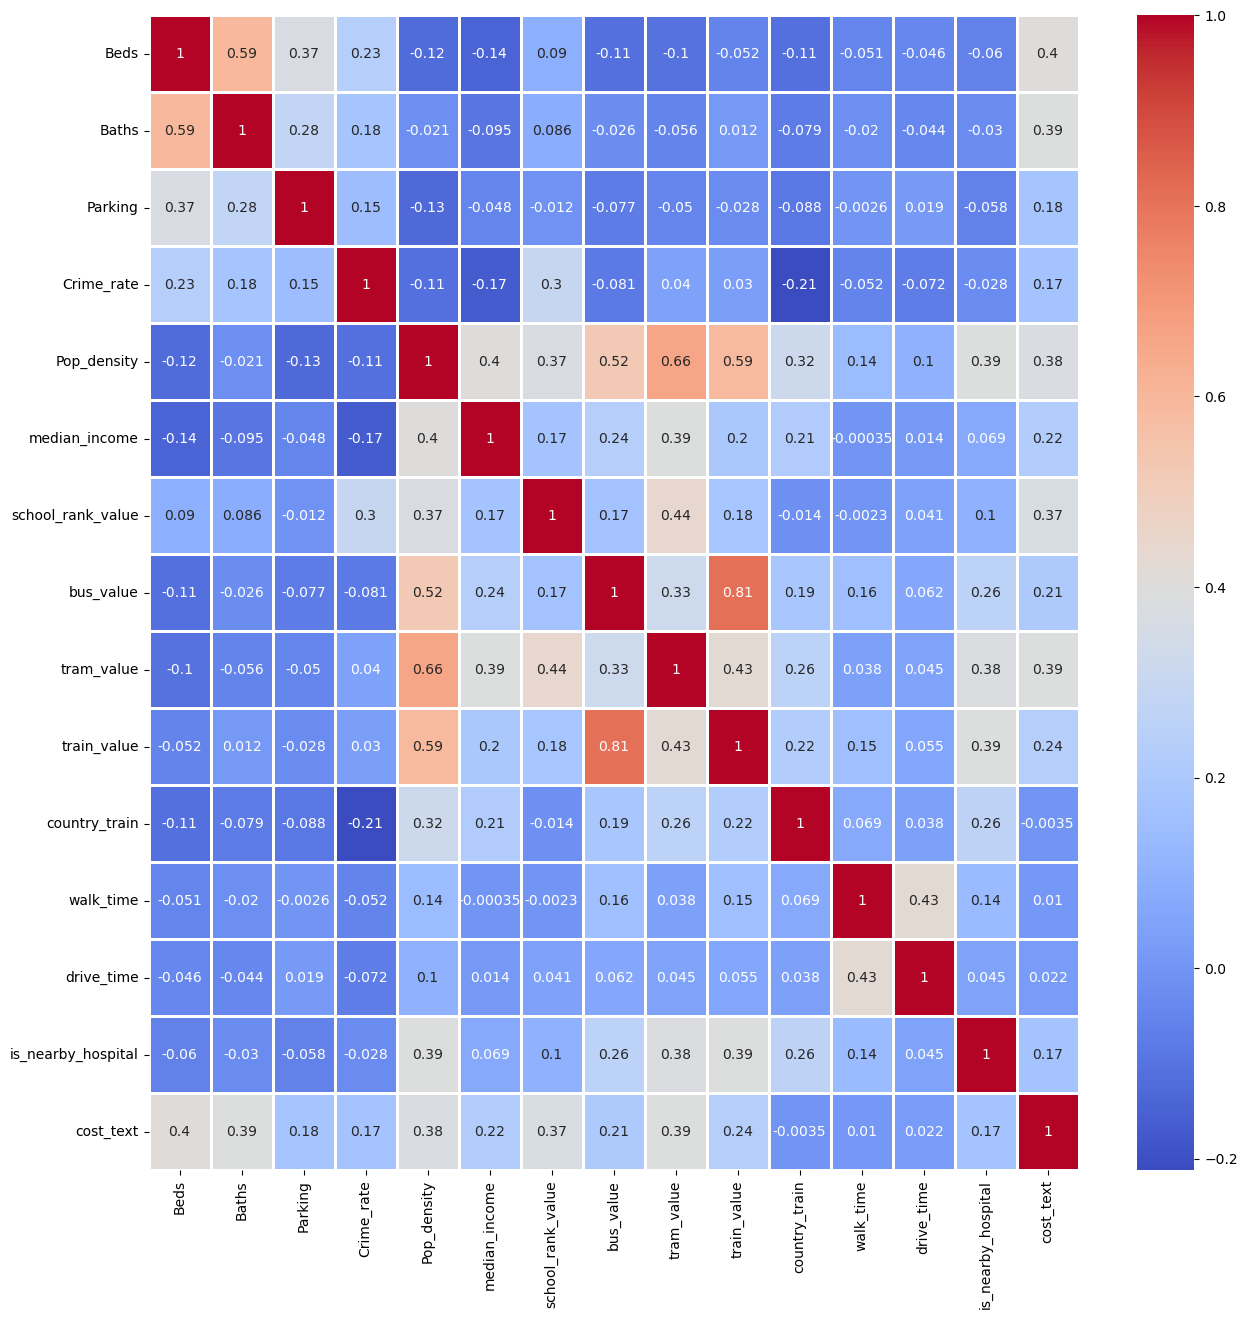

In [31]:
# Calculate correlations
corr = town_house.corr()
# Create a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.show()

#### 3.3 ANOVA Table

In [39]:
# Ensure that 'cost_text' is treated as a numeric variable
town_house['cost_text'] = pd.to_numeric(town_house['cost_text'], errors='coerce')

# Fit the model
tmodel = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + train_value + country_train + \
              walk_time + drive_time + is_nearby_hospital', data=town_house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(tmodel, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.175859e+05     1.0    4.779046  2.902460e-02
Beds                2.706098e+06     1.0  109.983974  1.469673e-24
Baths               1.275745e+06     1.0   51.850121  1.128306e-12
Parking             6.410287e+04     1.0    2.605333  1.068002e-01
Pop_density         8.985081e+05     1.0   36.518071  2.086856e-09
median_income       5.436789e+05     1.0   22.096744  2.931252e-06
school_rank_value   3.397508e+05     1.0   13.808494  2.129100e-04
bus_value           1.889359e+05     1.0    7.678923  5.683941e-03
tram_value          9.011851e+05     1.0   36.626872  1.977223e-09
train_value         1.278754e+05     1.0    5.197240  2.281929e-02
country_train       3.907200e+05     1.0   15.880036  7.206798e-05
walk_time           9.317928e+03     1.0    0.378709  5.384263e-01
drive_time          1.119149e+04     1.0    0.454856  5.001840e-01
is_nearby_hospital  1.101371e+05     1.0    4.476305  3.459893

In [41]:
# Fit the model
tmodel1 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
               school_rank_value + bus_value + tram_value + train_value + country_train + \
               drive_time + is_nearby_hospital', data=town_house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(tmodel1, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.170490e+05     1.0    4.759990  2.934594e-02
Beds                2.715731e+06     1.0  110.439655  1.190400e-24
Baths               1.273483e+06     1.0   51.788260  1.162058e-12
Parking             6.346247e+04     1.0    2.580805  1.084619e-01
Pop_density         8.913117e+05     1.0   36.246656  2.386985e-09
median_income       5.490789e+05     1.0   22.329195  2.603146e-06
school_rank_value   3.437762e+05     1.0   13.980226  1.945388e-04
bus_value           1.849653e+05     1.0    7.521917  6.197115e-03
tram_value          9.157429e+05     1.0   37.240191  1.458416e-09
train_value         1.288601e+05     1.0    5.240309  2.226364e-02
country_train       3.922281e+05     1.0   15.950598  6.946468e-05
drive_time          5.187664e+03     1.0    0.210965  6.461056e-01
is_nearby_hospital  1.054183e+05     1.0    4.287009  3.864431e-02
Residual            2.628690e+07  1069.0         NaN          

In [42]:
tmodel2 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
               school_rank_value + bus_value + tram_value + train_value + country_train + \
               is_nearby_hospital', data=town_house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(tmodel2, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.144320e+05     1.0    4.656999  3.114915e-02
Beds                2.711863e+06     1.0  110.363729  1.229523e-24
Baths               1.269580e+06     1.0   51.667660  1.231473e-12
Parking             6.592374e+04     1.0    2.682875  1.017264e-01
Pop_density         9.074394e+05     1.0   36.929746  1.700486e-09
median_income       5.456615e+05     1.0   22.206598  2.770827e-06
school_rank_value   3.476724e+05     1.0   14.149103  1.780318e-04
bus_value           1.856019e+05     1.0    7.553377  6.090509e-03
tram_value          9.124124e+05     1.0   37.132130  1.538174e-09
train_value         1.292715e+05     1.0    5.260917  2.200266e-02
country_train       3.920975e+05     1.0   15.957055  6.922737e-05
is_nearby_hospital  1.058602e+05     1.0    4.308154  3.816852e-02
Residual            2.629209e+07  1070.0         NaN           NaN


In [43]:
tmodel3 = ols('cost_text ~ Crime_rate + Beds + Baths + Pop_density + median_income + \
               school_rank_value + bus_value + tram_value + train_value + country_train + \
               is_nearby_hospital', data=town_house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(tmodel3, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.233799e+05     1.0    5.013271  2.535845e-02
Beds                3.116771e+06     1.0  126.643148  7.574943e-28
Baths               1.333127e+06     1.0   54.168693  3.657884e-13
Pop_density         8.684184e+05     1.0   35.286275  3.843776e-09
median_income       5.657376e+05     1.0   22.987505  1.860773e-06
school_rank_value   3.327623e+05     1.0   13.521066  2.476106e-04
bus_value           1.782033e+05     1.0    7.240900  7.237072e-03
tram_value          9.454204e+05     1.0   38.415084  8.146986e-10
train_value         1.196834e+05     1.0    4.863074  2.764930e-02
country_train       4.008033e+05     1.0   16.285765  5.834429e-05
is_nearby_hospital  1.022704e+05     1.0    4.155532  4.174395e-02
Residual            2.635801e+07  1071.0         NaN           NaN


#### 3.3.1 Final model

In [45]:
tmodel3 = ols('cost_text ~ Crime_rate + Beds + Baths + Pop_density + median_income + \
               school_rank_value + bus_value + tram_value + train_value + country_train + \
               is_nearby_hospital', data=town_house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(tmodel3, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.233799e+05     1.0    5.013271  2.535845e-02
Beds                3.116771e+06     1.0  126.643148  7.574943e-28
Baths               1.333127e+06     1.0   54.168693  3.657884e-13
Pop_density         8.684184e+05     1.0   35.286275  3.843776e-09
median_income       5.657376e+05     1.0   22.987505  1.860773e-06
school_rank_value   3.327623e+05     1.0   13.521066  2.476106e-04
bus_value           1.782033e+05     1.0    7.240900  7.237072e-03
tram_value          9.454204e+05     1.0   38.415084  8.146986e-10
train_value         1.196834e+05     1.0    4.863074  2.764930e-02
country_train       4.008033e+05     1.0   16.285765  5.834429e-05
is_nearby_hospital  1.022704e+05     1.0    4.155532  4.174395e-02
Residual            2.635801e+07  1071.0         NaN           NaN


### 4. House 

#### 4.1 heat map

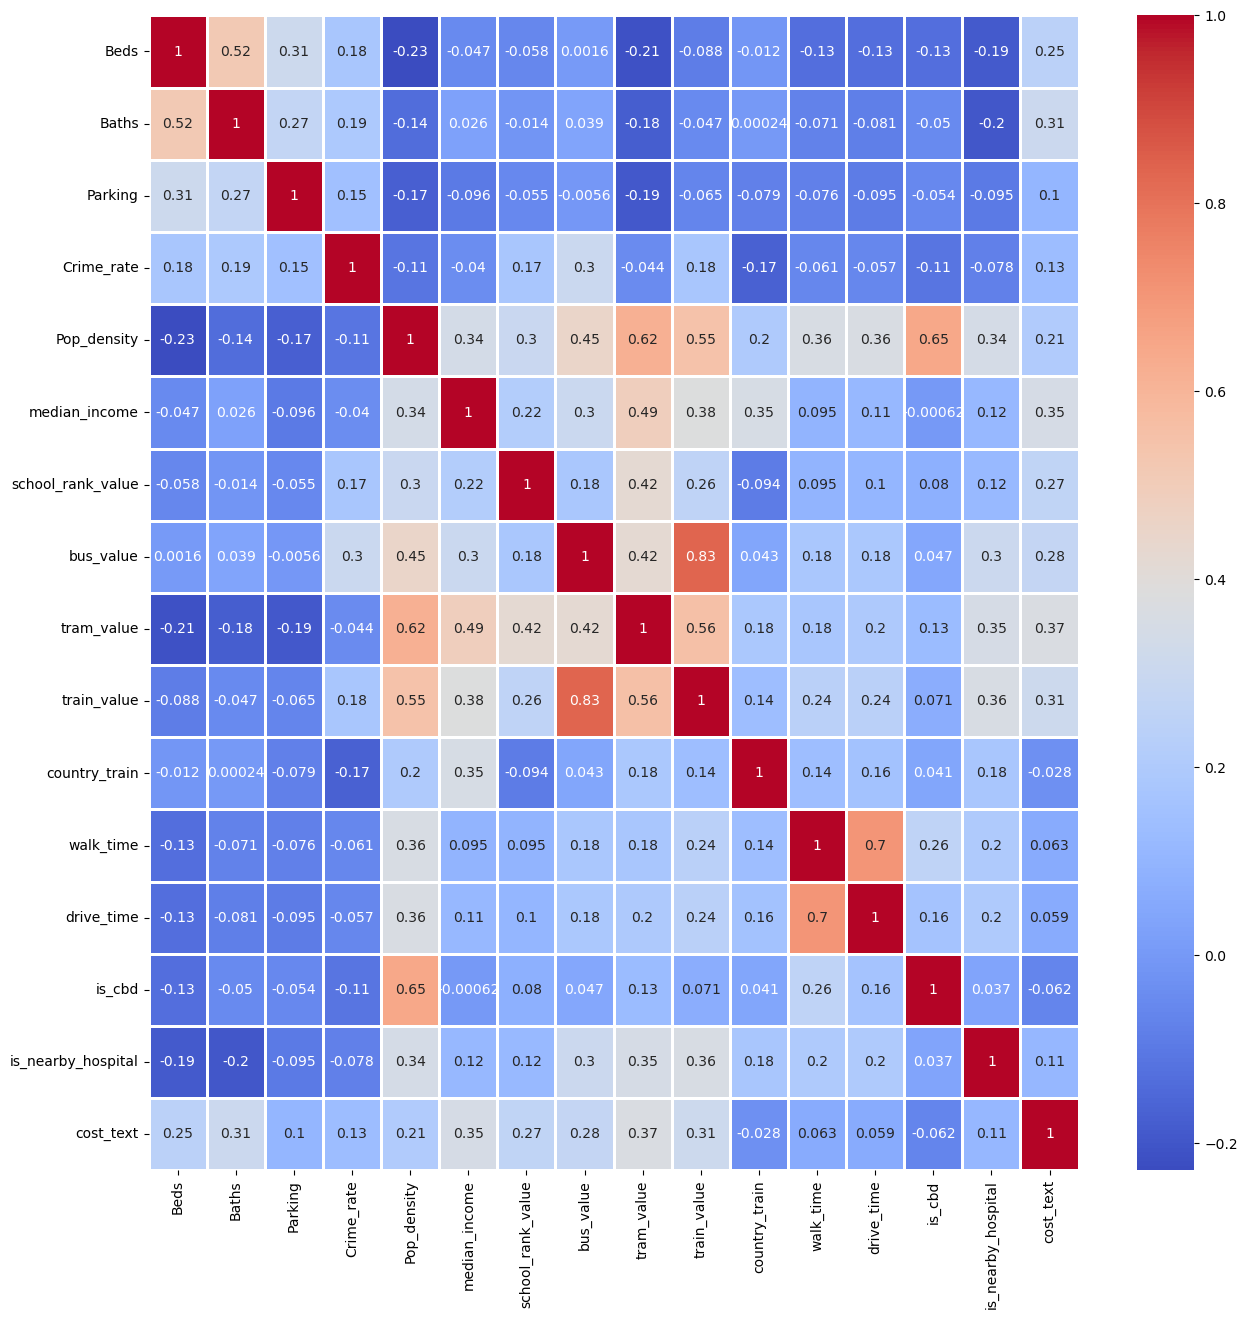

In [47]:
# remove outlier (there is a exteme value in price)
house = house[house['cost_text'] <= 5000]

# Calculate correlations
corr = house.corr()
# Create a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.show()

#### 4.2 ANOVA Table

In [48]:
# Ensure that 'cost_text' is treated as a numeric variable
house['cost_text'] = pd.to_numeric(house['cost_text'], errors='coerce')

# Fit the model
hmodel = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + train_value + country_train + \
              walk_time + drive_time + is_cbd + is_nearby_hospital', data=house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(hmodel, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.945880e+05     1.0    7.412551  6.497208e-03
Beds                5.493023e+06     1.0  209.248895  1.388097e-46
Baths               1.106689e+07     1.0  421.577309  2.284908e-90
Parking             6.583773e+05     1.0   25.079946  5.669734e-07
Pop_density         6.700101e+05     1.0   25.523080  4.510664e-07
median_income       6.843808e+06     1.0  260.705091  2.374932e-57
school_rank_value   5.637520e+05     1.0   21.475329  3.665799e-06
bus_value           3.194251e+05     1.0   12.168044  4.899107e-04
tram_value          6.640466e+06     1.0  252.959084  9.766679e-56
train_value         4.617957e+05     1.0   17.591450  2.780678e-05
country_train       5.732748e+06     1.0  218.380866  1.674541e-48
walk_time           2.584207e+05     1.0    9.844168  1.712599e-03
drive_time          3.370569e+04     1.0    1.283970  2.572109e-01
is_cbd              1.760987e+06     1.0   67.082273  3.200798

In [49]:
# Fit the model
hmodel1 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + train_value + country_train + \
              walk_time + is_cbd + is_nearby_hospital', data=house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(hmodel1, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.927368e+05     1.0    7.341658  6.758080e-03
Beds                5.508603e+06     1.0  209.831683  1.046484e-46
Baths               1.107672e+07     1.0  421.930336  1.935842e-90
Parking             6.632737e+05     1.0   25.265180  5.152699e-07
Pop_density         6.364254e+05     1.0   24.242484  8.738769e-07
median_income       6.879224e+06     1.0  262.040859  1.251165e-57
school_rank_value   5.605843e+05     1.0   21.353570  3.905173e-06
bus_value           3.175290e+05     1.0   12.095197  5.093822e-04
tram_value          6.744191e+06     1.0  256.897232  1.474395e-56
train_value         4.666270e+05     1.0   17.774584  2.526207e-05
country_train       5.793394e+06     1.0  220.679842  5.511605e-49
walk_time           2.658314e+05     1.0   10.125952  1.469994e-03
is_cbd              1.731955e+06     1.0   65.973002  5.581507e-16
is_nearby_hospital  5.750114e+05     1.0   21.903124  2.935566

#### 4.2.1 Final Model

In [50]:
# Fit the model
hmodel1 = ols('cost_text ~ Crime_rate + Beds + Baths + Parking + Pop_density + median_income + \
              school_rank_value + bus_value + tram_value + train_value + country_train + \
              walk_time + is_cbd + is_nearby_hospital', data=house).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(hmodel1, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Crime_rate          1.927368e+05     1.0    7.341658  6.758080e-03
Beds                5.508603e+06     1.0  209.831683  1.046484e-46
Baths               1.107672e+07     1.0  421.930336  1.935842e-90
Parking             6.632737e+05     1.0   25.265180  5.152699e-07
Pop_density         6.364254e+05     1.0   24.242484  8.738769e-07
median_income       6.879224e+06     1.0  262.040859  1.251165e-57
school_rank_value   5.605843e+05     1.0   21.353570  3.905173e-06
bus_value           3.175290e+05     1.0   12.095197  5.093822e-04
tram_value          6.744191e+06     1.0  256.897232  1.474395e-56
train_value         4.666270e+05     1.0   17.774584  2.526207e-05
country_train       5.793394e+06     1.0  220.679842  5.511605e-49
walk_time           2.658314e+05     1.0   10.125952  1.469994e-03
is_cbd              1.731955e+06     1.0   65.973002  5.581507e-16
is_nearby_hospital  5.750114e+05     1.0   21.903124  2.935566